# Description : Program used for predicting the price of BitCoin.

# Importing Libraries :

In [66]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Importing Dataset :

In [67]:
api_key = '1a8d5127571f4295b6fcb54cf1faaaaf'
symbol = 'BTC/INR'
interval = '5min'
order = 'asc'
start_date = '2022-01-08 06:00:00'
end_date = '2022-01-26 00:00:00'

api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'


In [68]:
data = requests.get(api_url).json()
data_final = pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2022-01-08 15:20:00,3091746.00000,3094824.25000,3091746.00000,3092770.25000
1,2022-01-08 15:25:00,3089894.00000,3089894.00000,3086268.00000,3089139.25000
2,2022-01-08 15:30:00,3089802.75000,3092887.50000,3083394.25000,3083394.25000
3,2022-01-08 15:35:00,3082846.50000,3088288.50000,3082846.50000,3088015.50000
4,2022-01-08 15:40:00,3088689.50000,3093807.25000,3088689.50000,3093807.25000
...,...,...,...,...,...
4995,2022-01-25 23:40:00,2763565.75000,2763565.75000,2760020.00000,2761070.00000
4996,2022-01-25 23:45:00,2760387.25000,2768787.25000,2760387.25000,2768787.25000
4997,2022-01-25 23:50:00,2767875.00000,2767875.00000,2763488.00000,2764794.50000
4998,2022-01-25 23:55:00,2762586.00000,2762879.00000,2758644.00000,2760929.50000


In [69]:
data.keys()

dict_keys(['meta', 'values', 'status'])

# Data Cleaning :

In [70]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_final['close'].values.reshape(-1,1))

In [71]:
data_final['close'].values.reshape(-1,1)

array([['3092770.25000'],
       ['3089139.25000'],
       ['3083394.25000'],
       ...,
       ['2764794.50000'],
       ['2760929.50000'],
       ['2756677.00000']], dtype=object)

In [72]:
data_final['close'].values.reshape(-1,1).shape

(5000, 1)

In [73]:
scaled_data

array([[0.77616532],
       [0.77162504],
       [0.76444136],
       ...,
       [0.3660571 ],
       [0.36122421],
       [0.35590679]])

In [74]:
scaled_data.shape

(5000, 1)

# Create Training Dataset :

In [75]:
time_interval_to_train = 24
prediction_interval = 12

x_train = []
y_train = []

In [76]:
for i in range(time_interval_to_train, len(scaled_data) - prediction_interval):
    x_train.append(scaled_data[i - time_interval_to_train: i, 0])
    y_train.append(scaled_data[i + prediction_interval, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [77]:
x_train

array([[0.77616532, 0.77162504, 0.76444136, ..., 0.7343859 , 0.7296171 ,
        0.7434574 ],
       [0.77162504, 0.76444136, 0.77021988, ..., 0.7296171 , 0.7434574 ,
        0.73954264],
       [0.76444136, 0.77021988, 0.77746201, ..., 0.7434574 , 0.73954264,
        0.74181372],
       ...,
       [0.35655045, 0.35341595, 0.34560081, ..., 0.34508845, 0.34660084,
        0.34876876],
       [0.35341595, 0.34560081, 0.33188837, ..., 0.34660084, 0.34876876,
        0.35279043],
       [0.34560081, 0.33188837, 0.34141471, ..., 0.34876876, 0.35279043,
        0.35216803]])

In [78]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [79]:
x_train.shape

(4964, 24, 1)

# Training Model :

In [104]:
model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1), activation = 'relu'))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences = True, activation = 'relu'))
model.add(Dropout(0.3))
model.add(LSTM(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [105]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

In [106]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
78/78 [==============================] - 28s 326ms/step - loss: 0.0408 - accuracy: 2.0145e-04
Epoch 2/10
78/78 [==============================] - 25s 321ms/step - loss: 0.0038 - accuracy: 4.0290e-04
Epoch 3/10
78/78 [==============================] - 25s 321ms/step - loss: 0.0029 - accuracy: 4.0290e-04
Epoch 4/10
78/78 [==============================] - 25s 317ms/step - loss: 0.0028 - accuracy: 4.0290e-04
Epoch 5/10
78/78 [==============================] - 31s 404ms/step - loss: 0.0026 - accuracy: 4.0290e-04
Epoch 6/10
78/78 [==============================] - 26s 327ms/step - loss: 0.0025 - accuracy: 4.0290e-04
Epoch 7/10
78/78 [==============================] - 26s 336ms/step - loss: 0.0025 - accuracy: 4.0290e-04
Epoch 8/10
78/78 [==============================] - 26s 334ms/step - loss: 0.0024 - accuracy: 4.0290e-04
Epoch 9/10
78/78 [==============================] - 26s 332ms/step - loss: 0.0024 - accuracy: 4.0290e-04
Epoch 10/10
78/78 [==============================] - 26

# Create Testing Dataset :

In [107]:
test_start = '2022-01-27 06:00:00'
test_end = '2022-02-12 00:00:00'

test_api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={test_start}&end_date={test_end}&interval={interval}&order={order}&apikey={api_key}'
test_data = requests.get(test_api_url).json()
test_data_final = pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2022-01-27 06:00:00,2703329.00000,2704087.00000,2702321.00000,2702370.25000
1,2022-01-27 06:05:00,2700969.25000,2700969.25000,2696151.50000,2696587.25000
2,2022-01-27 06:10:00,2701038.00000,2701374.75000,2698813.25000,2699671.25000
3,2022-01-27 06:15:00,2700533.50000,2703333.75000,2698615.25000,2703333.75000
4,2022-01-27 06:20:00,2704275.00000,2705182.00000,2703905.50000,2703905.50000
...,...,...,...,...,...
4521,2022-02-11 23:40:00,3205851.50000,3205851.50000,3202725.25000,3202725.25000
4522,2022-02-11 23:45:00,3204010.25000,3204010.25000,3197602.75000,3198840.25000
4523,2022-02-11 23:50:00,3201275.75000,3206968.00000,3201275.75000,3205575.50000
4524,2022-02-11 23:55:00,3206422.00000,3206828.00000,3204778.25000,3204778.25000


In [108]:
test_data_final['close']

0       2702370.25000
1       2696587.25000
2       2699671.25000
3       2703333.75000
4       2703905.50000
            ...      
4521    3202725.25000
4522    3198840.25000
4523    3205575.50000
4524    3204778.25000
4525    3200853.00000
Name: close, Length: 4526, dtype: object

In [109]:
 pd.to_numeric(test_data_final['close'])

0       2702370.25
1       2696587.25
2       2699671.25
3       2703333.75
4       2703905.50
           ...    
4521    3202725.25
4522    3198840.25
4523    3205575.50
4524    3204778.25
4525    3200853.00
Name: close, Length: 4526, dtype: float64

In [110]:
bitcoin_prices = pd.to_numeric(test_data_final['close'], errors = 'coerce').values

test_inputs = test_data_final['close'].values
test_inputs = test_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(test_inputs)

In [111]:
test_inputs

array([['2702370.25000'],
       ['2696587.25000'],
       ['2699671.25000'],
       ...,
       ['3205575.50000'],
       ['3204778.25000'],
       ['3200853.00000']], dtype=object)

In [112]:
model_inputs.shape

(4526, 1)

In [113]:
x_test = []

for x in range(time_interval_to_train, len(model_inputs)):
    x_test.append(model_inputs[x - time_interval_to_train:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [114]:
x_test.shape

(4502, 24, 1)

# Evaluating the Model :

In [115]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

In [116]:
prediction_prices

array([[2744686.2],
       [2745337.5],
       [2746168.5],
       ...,
       [3200462. ],
       [3200103.5],
       [3200037.5]], dtype=float32)

In [130]:
last_data = model_inputs[len(model_inputs) - time_interval_to_train : len(model_inputs)+1, 0]
last_data = np.array(last_data)

In [131]:
last_data.shape

(24,)

In [132]:
last_data = np.reshape(last_data, (1, last_data.shape[0], 1))

In [133]:
last_data.shape

(1, 24, 1)

In [134]:
prediction = model.predict(last_data)

In [135]:
prediction = scaler.inverse_transform(prediction)


array([[3200186.5]], dtype=float32)

# Result :

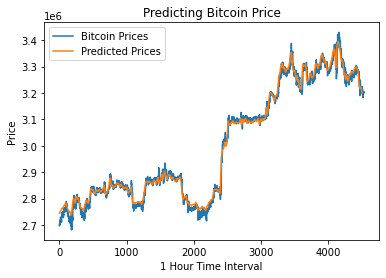

In [117]:
plt.plot(bitcoin_prices, label = 'Bitcoin Prices')
plt.plot(prediction_prices, label = 'Predicted Prices')
plt.title('Predicting Bitcoin Price')
plt.xlabel('1 Hour Time Interval')
plt.ylabel('Price')
plt.legend()
plt.show()

In [136]:
prediction

array([[3200186.5]], dtype=float32)